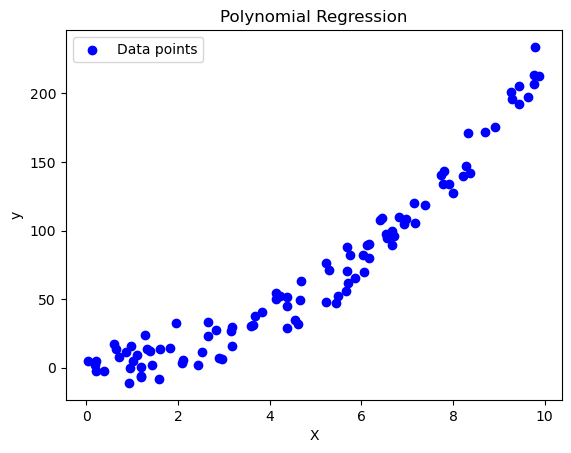

Mean Squared Error: 97.36


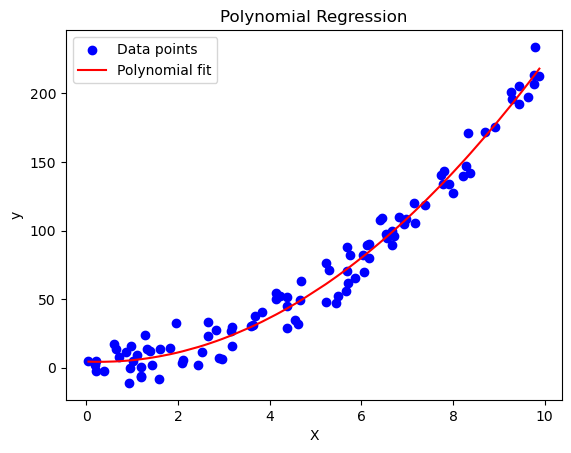

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Random values between 0 and 10
y = 2.5 * X**2 - 3 * X + 5 + np.random.randn(100, 1) * 10  # Quadratic with noise

# Visualize the data
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# Transform the features to include polynomial terms (degree=2)
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualize the polynomial regression curve
plt.scatter(X, y, color='blue', label='Data points')
sorted_indices = np.argsort(X.flatten())
plt.plot(X[sorted_indices], y_pred[sorted_indices], color='red', label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


Ridge Regression Mean Squared Error: 91.18
Lasso Regression Mean Squared Error: 92.75


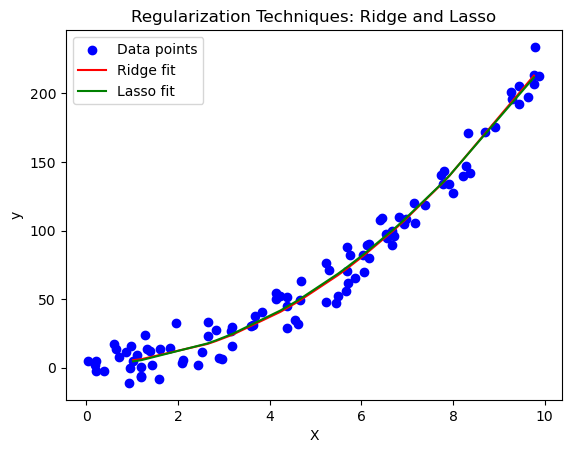

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Random values between 0 and 10
y = 2.5 * X**2 - 3 * X + 5 + np.random.randn(100, 1) * 10  # Quadratic with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features to include polynomial terms (degree=2)
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {ridge_mse:.2f}")

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_poly, y_train)
y_pred_lasso = lasso_model.predict(X_test_poly)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression Mean Squared Error: {lasso_mse:.2f}")

# Visualize the results
plt.scatter(X, y, color='blue', label='Data points')
sorted_indices = np.argsort(X_test.flatten())
plt.plot(X_test[sorted_indices], y_pred_ridge[sorted_indices], color='red', label='Ridge fit')
plt.plot(X_test[sorted_indices], y_pred_lasso[sorted_indices], color='green', label='Lasso fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regularization Techniques: Ridge and Lasso')
plt.legend()
plt.show()
